In [68]:
#analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
datadeaths = pd.read_csv('CovidData/CovidDeaths.csv')
datadeaths.head()
#different countries death of covid-19
#total deaths


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
0,AFG,Asia,Afghanistan,24-02-20,40099462.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
dataVacc = pd.read_csv('CovidData/CovidVaccinations.csv')
dataVacc.head()
#vaccination data
#hanwahsing faccilities, human life expectancy

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [71]:
datacombs = []
datacombs = datadeaths.merge(dataVacc, on = ["iso_code", "continent", "location","date"])
#data combined

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

In [73]:
#using datacombs that contains nan value
taiwan_case= datacombs[datacombs["location"]=="Taiwan"]
#datacombs.head()
#taiwan_case.head()


In [74]:
import datetime as dt
taiwan_case['date'] = pd.to_datetime(taiwan_case['date'])
taiwan_case.tail(10)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
188704,TWN,Asia,Taiwan,2022-08-29,23859912.0,5242009.0,20424.0,25975.857,9866.0,22.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188705,TWN,Asia,Taiwan,2022-08-30,23859912.0,5273449.0,31440.0,26704.000,9893.0,27.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188706,TWN,Asia,Taiwan,2022-08-31,23859912.0,5308029.0,34580.0,27568.143,9914.0,21.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188707,TWN,Asia,Taiwan,2022-01-09,23859912.0,5342106.0,34077.0,28546.714,9950.0,36.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188708,TWN,Asia,Taiwan,2022-02-09,23859912.0,5375883.0,33777.0,29555.143,9986.0,36.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188709,TWN,Asia,Taiwan,2022-03-09,23859912.0,5408641.0,32758.0,30541.571,10028.0,42.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188710,TWN,Asia,Taiwan,2022-04-09,23859912.0,5442981.0,34340.0,31628.000,10063.0,35.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188711,TWN,Asia,Taiwan,2022-05-09,23859912.0,5467059.0,24078.0,32150.000,10094.0,31.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188712,TWN,Asia,Taiwan,2022-06-09,23859912.0,5503725.0,36666.0,32896.571,10115.0,21.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
188713,TWN,Asia,Taiwan,2022-07-09,23859912.0,5544974.0,41249.0,33849.286,10141.0,26.0,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN


In [75]:
taiwan_case['date']= taiwan_case['date'].map(dt.datetime.toordinal)
taiwan_case.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
187748,TWN,Asia,Taiwan,737440,23859912.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
187749,TWN,Asia,Taiwan,737441,23859912.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
187750,TWN,Asia,Taiwan,737442,23859912.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
187751,TWN,Asia,Taiwan,737443,23859912.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
187752,TWN,Asia,Taiwan,737444,23859912.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN


In [76]:
x = taiwan_case['date'] #independent
y = taiwan_case['total_cases'] #dependent

In [85]:
#use simple imputer to replace all nan values with the mean for the total cases 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
y = np.array(y).reshape(-1,1)
imp.fit(y)



#did not do so for x becaus it is a string and also the dates are not missing

SimpleImputer()

In [78]:
y= imp.transform(y)


In [79]:
x = np.array(x).reshape(-1,1)
imp.fit(x)

SimpleImputer()

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [99]:
lr = LinearRegression()
lr.fit(x_train, y_train)
#linear regression for training the data

LinearRegression()

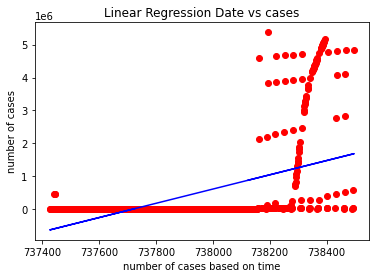

In [100]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Linear Regression Date vs cases')
plt.xlabel('number of cases based on time')
plt.ylabel('number of cases')
plt.show()

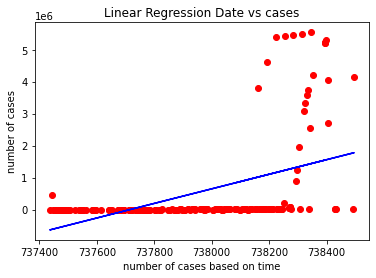

In [97]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, lr.predict(x_test), color='blue')
plt.title('Linear Regression Date vs cases')
plt.xlabel('number of cases based on time')
plt.ylabel('number of cases')
plt.show()

In [57]:
lr.predict(np.array([[738347]]))

array([[1360162.85818291]])

In [86]:
datacombs.describe()

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.134550e+05,2.057990e+05,2.055670e+05,2.043850e+05,1.869840e+05,186929.000000,185754.000000,204855.000000,204623.000000,203446.000000,...,133367.000000,131540.000000,86598.000000,156654.000000,200568.000000,171757.000000,7.146000e+03,7146.000000,7189.000000,7146.000000
mean,1.427552e+08,4.078681e+06,1.258980e+04,1.262519e+04,7.140379e+04,144.545458,145.292120,54232.246263,189.262622,189.669687,...,10.657673,32.803635,50.855628,3.084197,73.637596,0.724926,4.567256e+04,9.727418,14.604108,1256.030346
std,6.949778e+08,2.556119e+07,8.676016e+04,8.482775e+04,3.686606e+05,748.968482,734.415134,97922.768587,944.673409,621.871801,...,10.600755,13.535493,31.843205,2.550603,7.447679,0.149699,1.269947e+05,13.746641,26.965277,1668.272255
min,4.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,8.960070e+05,3.806500e+03,0.000000e+00,6.714000e+00,1.070000e+02,0.000000,0.143000,961.752000,0.000000,1.457000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.765000e+01,0.260000,-0.280000,11.100572
50%,7.425058e+06,4.480400e+04,6.100000e+01,9.957100e+01,1.091000e+03,1.000000,1.714000,9145.694000,8.692000,20.222000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.321250e+03,7.275000,7.230000,706.249704
75%,3.357387e+07,4.807570e+05,9.990000e+02,1.157857e+03,9.327000e+03,15.000000,16.714000,65702.968500,101.563500,137.672500,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.270655e+04,15.360000,20.390000,1969.750061
max,7.909295e+09,6.067716e+08,4.081701e+06,3.436129e+06,6.507544e+06,17737.000000,14858.143000,655309.333000,195005.313000,35258.843000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.180000,9750.477354
